In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns
from dateutil import parser

In [14]:
#acc = gpd.read_file('https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.geojson')

In [16]:
acc = gpd.read_file('../../data/Collisions.geojson')

In [21]:
#timeline=acc['INCDATE']

In [22]:
inc_datetimes=acc['INCDTTM']

In [23]:
dts = pd.Series([parser.parse(d) for d in inc_datetimes])

In [24]:
acc['year'] = pd.DataFrame([d.year for d in dts])
acc['month'] = pd.DataFrame([d.month for d in dts])
acc['week'] = pd.DataFrame([d.week for d in dts])
acc['day'] = pd.DataFrame([d.day for d in dts])
acc['hour'] = pd.DataFrame([d.hour for d in dts])
acc['weekday'] = pd.DataFrame([d.weekday() for d in dts])

In [25]:
acc_2015 = acc[acc['year'] == 2015]

In [26]:
def acc_2015_by(unit):
    x = acc_2015.groupby(unit).size().index
    y = acc_2015.groupby(unit).size().values

    plt.figure(figsize=(10,6)) 
    plt.bar(x, y, color = 'b')
    plt.title('Accidents per {} in 2015'.format(unit))
    plt.xlabel(unit)
    plt.ylabel('Number of Accidents')

    plt.savefig('{}_count_2015.png'.format(unit))

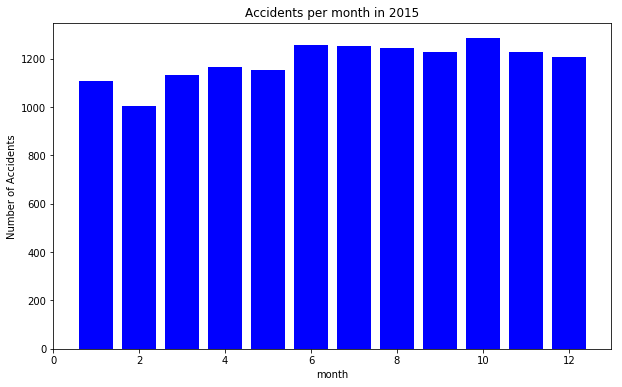

In [27]:
acc_2015_by('month')

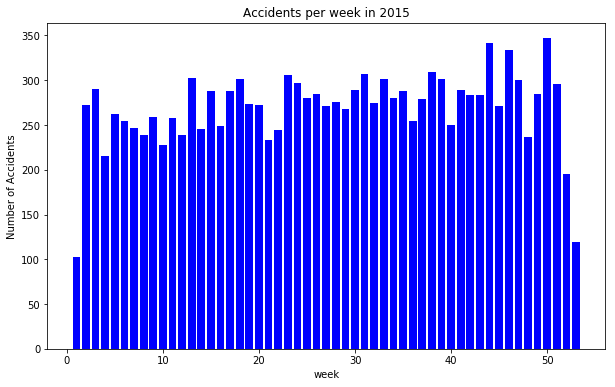

In [28]:
acc_2015_by('week')

In [29]:
acc_04_19 = acc[(acc['year'] > 2003) & (acc['year'] < 2019)]

#### We don't see a clear pattern here, except around new years (where there is also likely an artificial low, because the last/first week is split between years.). - A pattern could occur if we have the same peaks as here in every year.

In [30]:
def acc_by(unit):
    x = acc_04_19.groupby(unit).size().index
    y = acc_04_19.groupby(unit).size().values

    plt.figure(figsize=(10,6)) 
    plt.bar(x, y, color = 'b')
    plt.title('Accidents per {} 2004 - 2019'.format(unit))
    plt.xlabel(unit)
    plt.ylabel('Number of Accidents')

    plt.savefig('{}_count_04-19.png'.format(unit))

Let's first see if the aggregation over 15 years show the same peaks:

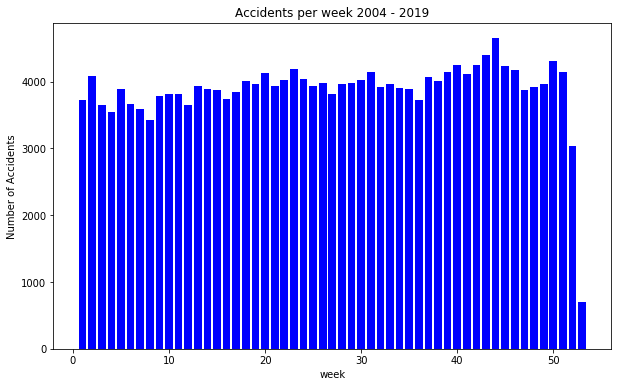

In [31]:
acc_by('week')

Let's go with a very limited hypothesis, that could easily be extended.
- We think that week 31 is always lower in acc than week 32. So our Zero Hypothesis is: the probability that the accident count of week 31 is higher than that of week 32 is 0.5 .
- Alternative hypothesis: the Probability that the accident count of week 31 is higher than that of week 32 is not equal to 0.5 .

Let's plot a comparison:

In [66]:
def compare_weeks(week1,week2):
    x1 = (acc_04_19[acc_04_19['week'] == week1]).groupby('year').size().index
    y1 = (acc_04_19[acc_04_19['week'] == week1]).groupby('year').size().values
    x2 = (acc_04_19[acc_04_19['week'] == week2]).groupby('year').size().index
    y2 = (acc_04_19[acc_04_19['week'] == week2]).groupby('year').size().values

    plt.figure()#figsize=(10,6)) 
    plt.bar(x1, y1, color = 'b')
    plt.bar(x2, y2, color = 'r')
    plt.title('Accidents in weeks {} and {} 2004 - 2019'.format(week1, week2))
    plt.xlabel('weeks {} (blue) and {} (red)'.format(week1, week2))
    plt.ylabel('Number of Accidents')

    plt.savefig('{}_{}_count_04-19.png'.format(week1, week2))

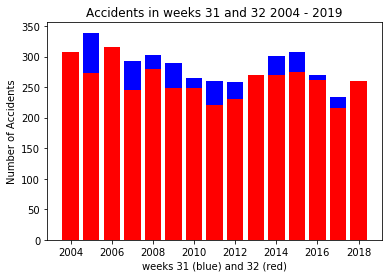

In [67]:
compare_weeks(31,32)

or better, lets plot the differences:

In [72]:
def difference_weeks(week1,week2):
    x = (acc_04_19[acc_04_19['week'] == week1]).groupby('year').size().index
    y1 = (acc_04_19[acc_04_19['week'] == week1]).groupby('year').size().values
    y2 = (acc_04_19[acc_04_19['week'] == week2]).groupby('year').size().values

    plt.figure()#figsize=(10,6)) 
    plt.bar(x, y1-y2, color = 'b')
    plt.title('Accidents in weeks {} and {} 2004 - 2019'.format(week1, week2))
    plt.xlabel('week {} minus week {}'.format(week1, week2))
    plt.ylabel('Number of Accidents')

    plt.savefig('{}_{}_count_04-19.png'.format(week1, week2))

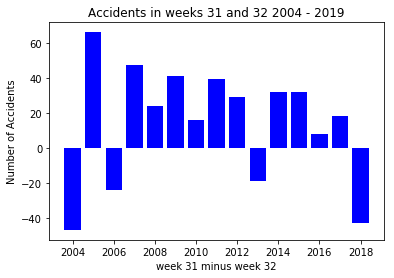

In [73]:
difference_weeks(31,32)

In [ ]:
Let's go to our hypothesis: